In [1]:
require(ggplot2, quietly=TRUE)
require(data.table, quietly=TRUE)
require(MLmetrics,quietly=TRUE)
require(glmnet,quietly=TRUE)
require(tidyverse,quietly=TRUE)


Attaching package: ‘MLmetrics’


The following object is masked from ‘package:base’:

    Recall


Loaded glmnet 4.0-2

── Attaching packages ──────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ─────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ tidyr::expand()    masks Matrix::expand()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ tidyr::pack()      masks Matrix::pack()
✖ purrr::transpose() masks data.table::transpose()
✖ tidyr::unpack()    masks Matrix::unpack()



In [2]:
x <- read.csv("/Users/canhakan/Downloads/hw3data_utf.csv", header = TRUE, dec=",",check.names = F)

In [3]:
colnames(x) <- c('Date','Time','Consumption')
x$Consumption <- gsub('\\.','',x$Consumption)
x$Consumption <- gsub(',','\\.',x$Consumption)
x$Consumption <- as.numeric(x$Consumption)

In [4]:
lag48_end <- length(x$Consumption)-48
lag48 <- c(rep(0,48),x$Consumption[1:lag48_end])

lag168_end <- length(x$Consumption)-168
lag168 <- c(rep(0,168),x$Consumption[1:lag168_end])
x <- cbind(x,lag48,lag168)

In [5]:
# xu$Date <- as.Date(xu$Date, "%d.%m.%Y")
# xu$Time <- as.numeric(sub(':.*','',xu$Time))
#
x$Date <- as.Date(x$Date, "%d.%m.%Y")
x$Time <- as.numeric(sub(':.*','',x$Time))

lag48_mape  <- MAPE(x[x$Date >= '2020-11-01',]$lag48,  x[x$Date >= '2020-11-01',]$Consumption)
cat('lag48 mape value is:',lag48_mape,'\n')

lag168_mape <- MAPE(x[x$Date >= '2020-11-01',]$lag168, x[x$Date >= '2020-11-01',]$Consumption)
cat('lag168 mape value is:',lag168_mape)

# end_point <- length(x$Consumption)
# 24*31=744 instances (November 1 to December 1) # bunu date olarak degisiciim
# st_point <- end_point-743

# lag48_mape <- MAPE(x$lag48[st_point:end_point],x$Consumption[st_point:end_point])
# cat('lag48 mape value is:',lag48_mape,'\n')

# lag168_mape <- MAPE(x$lag168[st_point:end_point],x$Consumption[st_point:end_point])
# cat('lag168 mape value is:',lag168_mape)


lag48 mape value is: 0.08060315 
lag168 mape value is: 0.03449188

# Part B 

In [6]:
end_point <- length(x$Consumption)
x <- x[169:end_point,]

In [14]:
x <- x[x$Date != '2016-03-27',]
x <- x[x$Date != '2016-03-29',]
x <- x[x$Date != '2016-04-03',]

In [15]:
x_train <- x[x$Date<"2020-11-01",]
x_test <- x[x$Date>="2020-11-01",]

set.seed(2021)
lin_fit <- lm(Consumption~lag48+lag168, x_train)
summary(lin_fit)


Call:
lm(formula = Consumption ~ lag48 + lag168, data = x_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-17125.7   -984.3     -1.2   1015.7  16097.4 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.570e+03  8.351e+01   18.80   <2e-16 ***
lag48       3.091e-01  3.096e-03   99.82   <2e-16 ***
lag168      6.430e-01  3.094e-03  207.83   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2388 on 42141 degrees of freedom
Multiple R-squared:  0.7757,	Adjusted R-squared:  0.7757 
F-statistic: 7.288e+04 on 2 and 42141 DF,  p-value: < 2.2e-16


In [16]:
x_pred <- predict(lin_fit,x_test)

In [53]:
lin_mape <- MAPE(x_pred, x_test$Consumption)
cat('MAPE value for our linear model is ', lin_mape)

MAPE value for our linear model is  0.04231015

# Part C

In [29]:
res_mape <- data.frame('Hours'=integer(),
                 'MAPE'=double())
for (t in c(0:23)){
    x_temp <- x[x$Time == t,]
    x_temp_train <- x_temp[x_temp$Date < '2020-11-01',]
    x_temp_test <- x_temp[x_temp$Date >= '2020-11-01',]
    fit_temp <- lm(Consumption~lag48+lag168,x_temp_train)
    x_temp_pred <- predict(fit_temp,x_temp_test)
    res_mape <- rbind(res_mape,c(t,MAPE(x_temp_pred,x_temp_test$Consumption)))
}
colnames(res_mape) <- c('Hour', 'MAPE')
res_mape

Hour,MAPE
<dbl>,<dbl>
0,0.03263542
1,0.03283588
2,0.03418989
3,0.03202953
4,0.03182975
5,0.03189139
6,0.03150869
7,0.03780175
8,0.04680474


In [30]:
res_mape <- cbind(res_mape,res_mape[,2]-lag168_mape)
res_mape[res_mape[,3] < 0,]

,Hour,MAPE,"res_mape[, 2] - lag168_mape"
,<dbl>,<dbl>,<dbl>
1,0,0.03263542,-0.0018564672
2,1,0.03283588,-0.0016560088
3,2,0.03418989,-0.0003019984
4,3,0.03202953,-0.0024623500
5,4,0.03182975,-0.0026621381
6,5,0.03189139,-0.0026004993
7,6,0.03150869,-0.0029831964
20,19,0.03436128,-0.0001306063
21,20,0.03165305,-0.0028388389


#  Part d

In [31]:
# Get the unique dates
unique_dates <- unique(x$Date)

In [39]:
m <- data.frame()
for (date_index in 1:length(unique_dates)){
    date <- as.Date(unique_dates[date_index],origin='2020-11-24')
    m <- rbind(m, cbind.data.frame(date, t(x[x$Date == date,]$lag168), t(x[x$Date == date,]$lag48), x[x$Date == date,][x$Time == 0,]$Consumption[1]))
}
for (j in c(2:25)){
    colnames(m)[j] <- paste('Lag_day7_hour',j-2,sep='_')
}
for (j in c(26:49)){
    colnames(m)[j] <- paste('Lag_day2_hour',j-26,sep='_')
}
colnames(m)[50] <- 'Consumption_0'
colnames(m)[1] <- 'Date'

m

Date,Lag_day7_hour_0,Lag_day7_hour_1,Lag_day7_hour_2,Lag_day7_hour_3,Lag_day7_hour_4,Lag_day7_hour_5,Lag_day7_hour_6,Lag_day7_hour_7,Lag_day7_hour_8,⋯,Lag_day2_hour_15,Lag_day2_hour_16,Lag_day2_hour_17,Lag_day2_hour_18,Lag_day2_hour_19,Lag_day2_hour_20,Lag_day2_hour_21,Lag_day2_hour_22,Lag_day2_hour_23,Consumption_0
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2016-01-08,26277.24,24991.82,23532.61,22464.78,22002.91,21957.08,22203.54,21844.16,23094.73,⋯,36433.88,37581.09,37304.52,35832.00,34499.94,33670.00,32931.12,32913.06,31450.65,28602.02
2016-01-09,26224.60,24708.58,23771.58,22921.29,22870.89,23325.63,23604.98,24022.70,26930.48,⋯,37100.43,37668.65,37906.99,35841.62,34621.65,33784.72,32638.14,32739.98,31092.87,29906.93
2016-01-10,27613.96,25779.28,24566.31,23878.42,23511.38,23672.32,23827.08,23405.11,24638.72,⋯,36190.41,37031.72,37773.70,35930.69,34710.46,33907.65,33048.69,33220.16,32021.60,28890.37
2016-01-11,27103.09,25439.84,24395.07,23961.03,23860.63,24418.47,25708.59,27455.39,32982.07,⋯,32951.39,33655.89,35045.14,34407.27,33494.32,32624.31,32097.79,32176.63,30760.17,27130.75
2016-01-12,29244.38,27637.23,26335.78,25870.23,25975.07,26318.48,27109.29,28570.22,33106.00,⋯,29447.75,30569.07,32006.15,31706.26,31305.87,30870.26,30462.79,30537.75,28857.66,29161.64
2016-01-13,29189.27,27614.02,26578.97,25719.19,25864.63,25918.59,27091.94,28533.05,33203.34,⋯,36013.19,36848.54,37368.40,35697.30,34482.37,33526.95,32634.16,32791.35,31147.83,28823.02
2016-01-14,28763.95,27284.84,26321.95,25748.49,25636.58,25932.52,26963.74,28444.83,32804.27,⋯,34785.11,35690.28,36566.50,35055.97,33912.94,33131.98,32332.76,32523.14,30906.87,29225.99
2016-01-15,28602.02,27112.37,25975.34,25315.55,25128.15,25356.22,26338.72,28086.42,32702.24,⋯,36012.25,36785.82,37173.82,35574.06,34298.68,33580.53,32554.09,32836.52,31307.88,29667.03
2016-01-16,29906.93,28061.98,26808.78,25798.80,25820.46,26035.77,26451.24,26853.42,30627.32,⋯,35936.67,36827.63,37481.89,36195.39,34914.82,34091.81,33323.90,33345.01,31938.60,29790.90



Call:  cv.glmnet(x = as.matrix(wide_train[, 2:49]), y = as.matrix(wide_train[,      50]), nfolds = 10, family = "gaussian") 

Measure: Mean-Squared Error 

    Lambda Measure    SE Nonzero
min  2.454  762136 44290      25
1se  8.226  802836 44948      18

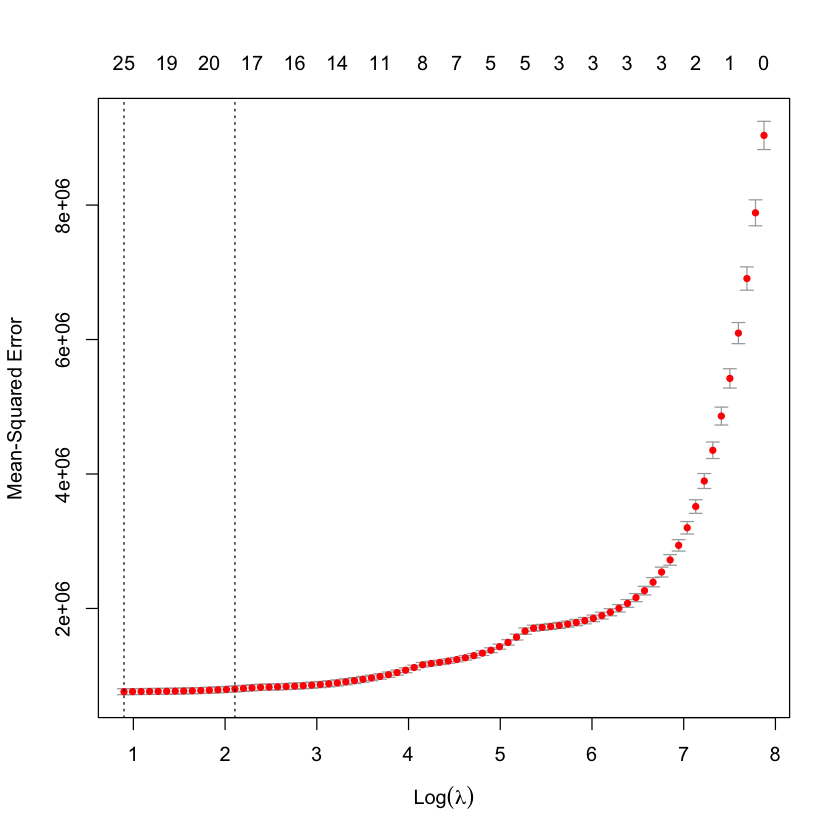

In [41]:
wide_data <- m
wide_train <-wide_data[wide_data$Date < '2020-11-01', ]
wide_test <- wide_data[wide_data$Date >= '2020-11-01', ]

set.seed(2021)
lasso_d = cv.glmnet(as.matrix(wide_train[,2:49]),as.matrix(wide_train[,50]),nfolds=10,family='gaussian')
plot(lasso_d)
lasso_d

In [46]:
model_d_min <- glmnet(as.matrix(wide_train[,2:49]),as.matrix(wide_train[,50]), alpha = 1, lambda = lasso_d$lambda.min)
model_d_1se <- glmnet(as.matrix(wide_train[,2:49]),as.matrix(wide_train[,50]), alpha = 1, lambda = lasso_d$lambda.1se)

predicted_wide_min <- predict(model_d_min,as.matrix(wide_test[,2:49]))
predicted_wide_1se <- predict(model_d_1se,as.matrix(wide_test[,2:49]))

cat('MAPE value for lambda_min is ', MAPE(predicted_wide_min,wide_test[,50]), '\n')
cat('MAPE value for lambda_1se is ', MAPE(predicted_wide_1se,wide_test[,50]))

MAPE value for lambda_min is  0.01403278 
MAPE value for lambda_1se is  0.01458865

In [52]:
mape_d <- data.frame('Hours'=integer(),
                     'MAPE_min'=double(),
                     'MAPE_1se'=double())
for (t in c(0:23)){
    m <- data.frame()
    for (date_index in 1:length(unique_dates)){
        date <- as.Date(unique_dates[date_index],origin='2020-11-24')
        m <- rbind(m, cbind.data.frame(date, t(x[x$Date == date,]$lag168), t(x[x$Date == date,]$lag48), x[x$Date == date,][x$Time == t,]$Consumption[1]))
    }
    for (j in c(2:25)){
        colnames(m)[j] <- paste('Lag_day7_hour',j-2,sep='_')
    }
    for (j in c(26:49)){
        colnames(m)[j] <- paste('Lag_day2_hour',j-26,sep='_')
    }
    colnames(m)[50] <- paste('Consumption',t,sep='_')
    colnames(m)[1] <- 'Date'

    wide_data <- m
    wide_train <-wide_data[wide_data$Date < '2020-11-01', ]
    wide_test <- wide_data[wide_data$Date >= '2020-11-01', ]

    set.seed(2021)
    lasso_d = cv.glmnet(as.matrix(wide_train[,2:49]),as.matrix(wide_train[,50]),nfolds=10,family='gaussian')
#     plot(lasso_d)
#     lasso_d

    model_d_min <- glmnet(as.matrix(wide_train[,2:49]),as.matrix(wide_train[,50]), alpha = 1, lambda = lasso_d$lambda.min)
    model_d_1se <- glmnet(as.matrix(wide_train[,2:49]),as.matrix(wide_train[,50]), alpha = 1, lambda = lasso_d$lambda.1se)

    predicted_wide_min <- predict(model_d_min,as.matrix(wide_test[,2:49]))
    predicted_wide_1se <- predict(model_d_1se,as.matrix(wide_test[,2:49]))
    
    mape_d <- rbind(mape_d, c(t,  MAPE(predicted_wide_min,wide_test[,50]),  MAPE(predicted_wide_1se,wide_test[,50])))
    cat('MAPE value for lambda_min at hour', t, ' is ', MAPE(predicted_wide_min,wide_test[,50]), '\t')
    cat('MAPE value for lambda_1se at hour', t, ' is ', MAPE(predicted_wide_1se,wide_test[,50]), '\n')
}

MAPE value for lambda_min at hour 0  is  0.01403278 	MAPE value for lambda_1se at hour 0  is  0.01458865 
MAPE value for lambda_min at hour 1  is  0.01560088 	MAPE value for lambda_1se at hour 1  is  0.01512567 
MAPE value for lambda_min at hour 2  is  0.01487986 	MAPE value for lambda_1se at hour 2  is  0.01533828 
MAPE value for lambda_min at hour 3  is  0.01397722 	MAPE value for lambda_1se at hour 3  is  0.01368293 
MAPE value for lambda_min at hour 4  is  0.01399875 	MAPE value for lambda_1se at hour 4  is  0.01366099 
MAPE value for lambda_min at hour 5  is  0.01409941 	MAPE value for lambda_1se at hour 5  is  0.01378373 
MAPE value for lambda_min at hour 6  is  0.01713375 	MAPE value for lambda_1se at hour 6  is  0.01633279 
MAPE value for lambda_min at hour 7  is  0.01798953 	MAPE value for lambda_1se at hour 7  is  0.01785413 
MAPE value for lambda_min at hour 8  is  0.0260944 	MAPE value for lambda_1se at hour 8  is  0.02533617 
MAPE value for lambda_min at hour 9  is  0.0364

# Part 6

In [54]:
mapes <- cbind(lag48_mape,lag168_mape, lin_mape, res_mape[,2], mape_d[,2], mape_d[,3])

In [56]:
colnames(mapes) <- c('Naive 48', 'Naive 168', 'Daily Linear', 'Hourly Linear', 'Lasso Min', 'Lasso 1se')
mapes

Naive 48,Naive 168,Daily Linear,Hourly Linear,Lasso Min,Lasso 1se
0.08060315,0.03449188,0.04231015,0.03263542,0.01403278,0.01458865
0.08060315,0.03449188,0.04231015,0.03283588,0.01560088,0.01512567
0.08060315,0.03449188,0.04231015,0.03418989,0.01487986,0.01533828
0.08060315,0.03449188,0.04231015,0.03202953,0.01397722,0.01368293
0.08060315,0.03449188,0.04231015,0.03182975,0.01399875,0.01366099
0.08060315,0.03449188,0.04231015,0.03189139,0.01409941,0.01378373
0.08060315,0.03449188,0.04231015,0.03150869,0.01713375,0.01633279
0.08060315,0.03449188,0.04231015,0.03780175,0.01798953,0.01785413
0.08060315,0.03449188,0.04231015,0.04680474,0.02609440,0.02533617
0.08060315,0.03449188,0.04231015,0.05494326,0.03641173,0.03645694


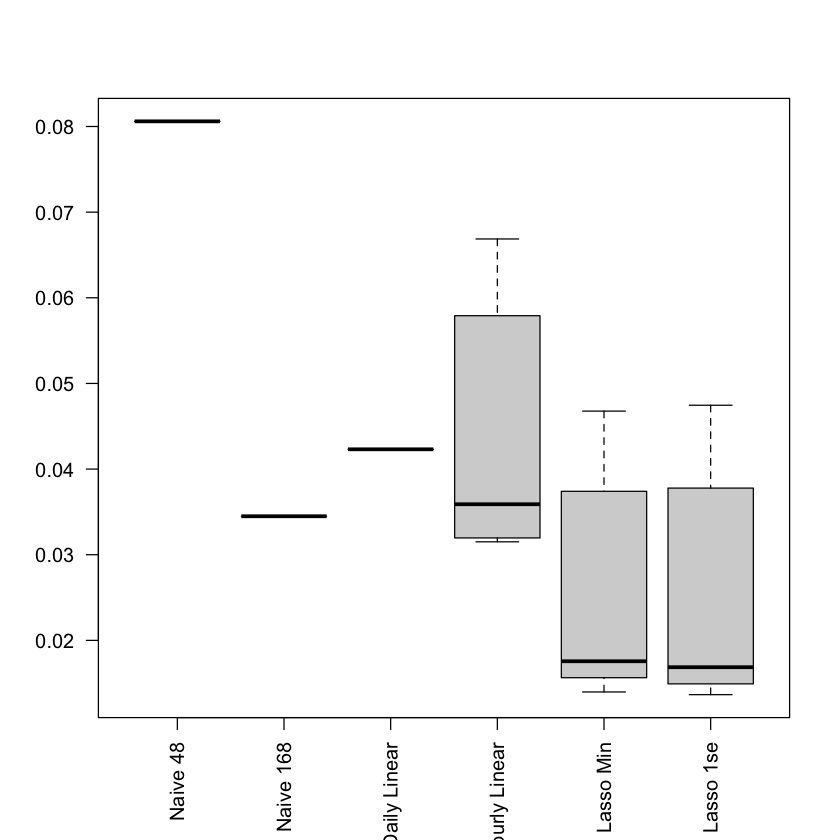

In [65]:
boxplot(mapes, las=2)

In [2]:
!jupyter nbconvert --execute duzenlihw3-Copy1.ipynb --to 'html'

ERROR: Error in parse(text = x, srcfile = src): <text>:1:10: unexpected symbol
1: !jupyter nbconvert
             ^
